## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [6]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
poll.vote.value_counts()

Brown    511
Green    489
Name: vote, dtype: int64

In [8]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [17]:
def sample(brown, n=1000):
    return pd.DataFrame({
        'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')
    })

In [21]:
s = sample(0.51, n=1000)


In [22]:
s.vote.value_counts(normalize=True)

Brown    0.5
Green    0.5
Name: vote, dtype: float64

In [24]:
dist = pd.DataFrame([sample(0.51, n=1000).vote.value_counts(normalize=True) for i in range(1000)])

In [25]:
dist.head()

,Green,Brown
vote,0.502,0.498
vote,0.475,0.525
vote,0.480,0.520
vote,0.491,0.509
vote,0.476,0.524


<AxesSubplot:>

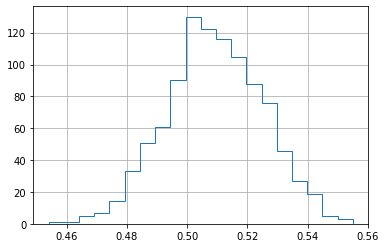

In [26]:
dist.Brown.hist(histtype='step', bins=20)

In [33]:
def sampling_dist(brown, n=1000):
    return pd.DataFrame([sample(brown, n=n).vote.value_counts(normalize=True) for i in range(1000)])

In [34]:
def quantile(brown, n=1000):
    dist = sampling_dist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [35]:
quantile(0.50)

(0.471, 0.532)

In [39]:
quantile(0.48)

(0.448975, 0.512025)

In [38]:
quantile(0.54)

(0.511, 0.571)

In [40]:
dist = sampling_dist(0.5, 10000)

<AxesSubplot:>

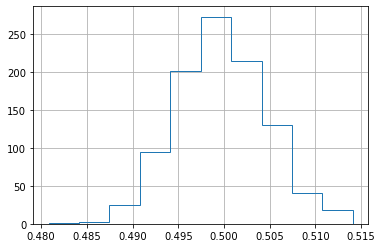

In [42]:
dist.Brown.hist(histtype='step')

In [43]:
largerpoll = pd.read_csv('poll-larger.csv')

In [45]:
largerpoll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [44]:
largerpoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64